# Day 13: Origami
The input for this problem is located at https://adventofcode.com/2021/day/13/input

In [71]:
%load_ext numpy_html

The numpy_html extension is already loaded. To reload it, use:
  %reload_ext numpy_html


In [72]:
import re

import matplotlib.pyplot as plt
import numpy as np

Load the problem. We can do this more concisely, but it's fun to imagine a more general class of problem in which we need to handle runs of different inputs.

In [73]:
with open("input.txt") as f:
    source = f.read()

In [74]:
source_dots, _, source_folds = source.partition("\n\n")

In [75]:
dots = [((int(i), int(j))) for i, j in re.findall(r"(\d+),(\d+)", source_dots)]
folds = [((ax, int(i))) for ax, i in re.findall(r"fold along (\w)=(\d+)", source_folds)]

In [76]:
j, i = zip(*dots)

In [77]:
paper = np.zeros((max(i) + 1, max(j) + 1), dtype=np.bool_)

In [78]:
np.add.at(paper, (i, j), 1)

In [171]:
def fold0(paper, at):
    left = paper[:at]
    right = paper[at + 1 :]

    δ = len(left) - len(right)

    if δ < 0:
        left = np.pad(left, [(-δ, 0), (0, 0)])
    else:
        right = np.pad(right, [(0, δ), (0, 0)])

    return np.logical_or(
        left,
        right[::-1],
    )

In [172]:
def fold(paper, axis, at):
    if axis == "y":
        return fold0(paper, at)
    return fold0(paper.T, at).T

In [186]:
ax, ix = folds[0]
fold(paper, ax, ix).sum()

785

In [187]:
folded = paper
for ax, ix in folds:
    folded = fold(folded, ax, ix)

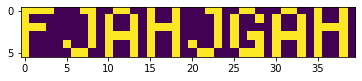

In [188]:
plt.imshow(folded, interpolation="none");